In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score


In [ ]:
df = pd.read_csv('/content/synthetic_data11.csv')


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


df.columns = [col.strip().replace('©', 'C').replace(' ', '_') for col in df.columns]


df.head(10)

,Pipe_age,Coating,Operating_pressure(psi),Pressure_cycles,Flow_rate_(bbl/d),Temperature_C,H2S_concentration,CO2_concentration,Water_cut,Previous_wall_loss,Pred._Wall_Loss_(mm),Corrosion_Probability,Wall_Loss_(%),Risk_Level
0,6,FBE,1164.279754,1000,1958,35.00,85,0.02956,0.6,0.5,0.58,0.587,38.75,Low
1,17,FBE,1200.000000,1000,2000,64.13,105,0.03675,0.4,0.8,0.92,0.056,42.94,Low
2,27,FBE,1144.181985,1000,1620,35.25,107,0.03234,0.5,0.7,0.82,0.334,24.55,Medium
3,17,FBE,1177.203139,1000,1958,63.68,93,0.03126,0.4,0.7,0.88,0.557,1.77,Medium
4,27,FBE,1118.446793,1000,1958,35.00,89,0.02650,0.6,0.6,0.69,0.771,21.73,High
5,17,FBE,1200.000000,1000,2000,64.13,92,0.03130,0.4,0.7,0.87,0.050,3.93,Low
6,17,FBE,1200.000000,1000,2000,64.13,166,0.02950,0.4,0.7,0.54,0.103,6.72,Low
7,17,FBE,1200.000000,1000,2000,64.13,155,0.03207,0.4,0.6,0.74,0.158,8.30,Low
8,27,FBE,960.457332,1000,2000,35.01,167,0.02300,0.5,0.5,0.60,0.478,9.24,Medium
9,17,FBE,1134.432507,1000,2000,64.13,121,0.03438,0.4,0.9,0.94,0.181,47.46,Low


In [ ]:
le = LabelEncoder()
df['Coating'] = le.fit_transform(df['Coating'])

In [ ]:
df.head()

,Pipe_age,Coating,Operating_pressure(psi),Pressure_cycles,Flow_rate_(bbl/d),Temperature_C,H2S_concentration,CO2_concentration,Water_cut,Previous_wall_loss,Pred._Wall_Loss_(mm),Corrosion_Probability,Wall_Loss_(%),Risk_Level
0,6,0,1164.279754,1000,1958,35.00,85,0.02956,0.6,0.5,0.58,0.587,38.75,Low
1,17,0,1200.000000,1000,2000,64.13,105,0.03675,0.4,0.8,0.92,0.056,42.94,Low
2,27,0,1144.181985,1000,1620,35.25,107,0.03234,0.5,0.7,0.82,0.334,24.55,Medium
3,17,0,1177.203139,1000,1958,63.68,93,0.03126,0.4,0.7,0.88,0.557,1.77,Medium
4,27,0,1118.446793,1000,1958,35.00,89,0.02650,0.6,0.6,0.69,0.771,21.73,High


In [ ]:
features = ['Pipe_age', 'Coating', 'Operating_pressure(psi)', 'Pressure_cycles',
            'Flow_rate_(bbl/d)', 'Temperature_C', 'H2S_concentration', 'CO2_concentration',
            'Water_cut', 'Previous_wall_loss']

In [ ]:
df.rename(columns={'Pred._Wall_Loss_(mm)': 'Pred_Wall_Loss_mm',
                   'Corrosion_Probability': 'Corrosion_Prob'}, inplace=True)

In [ ]:
df.head(5)

,Pipe_age,Coating,Operating_pressure(psi),Pressure_cycles,Flow_rate_(bbl/d),Temperature_C,H2S_concentration,CO2_concentration,Water_cut,Previous_wall_loss,Pred_Wall_Loss_mm,Corrosion_Prob,Wall_Loss_(%),Risk_Level
0,6,0,1164.279754,1000,1958,35.00,85,0.02956,0.6,0.5,0.58,0.587,38.75,Low
1,17,0,1200.000000,1000,2000,64.13,105,0.03675,0.4,0.8,0.92,0.056,42.94,Low
2,27,0,1144.181985,1000,1620,35.25,107,0.03234,0.5,0.7,0.82,0.334,24.55,Medium
3,17,0,1177.203139,1000,1958,63.68,93,0.03126,0.4,0.7,0.88,0.557,1.77,Medium
4,27,0,1118.446793,1000,1958,35.00,89,0.02650,0.6,0.6,0.69,0.771,21.73,High


In [ ]:
X = df[features]
y_reg = df['Pred_Wall_Loss_mm']         # Regression target
# y_class = df['Corrosion_Prob']          # Classification target


In [ ]:
X

,Pipe_age,Coating,Operating_pressure(psi),Pressure_cycles,Flow_rate_(bbl/d),Temperature_C,H2S_concentration,CO2_concentration,Water_cut,Previous_wall_loss
0,6,0,1164.279754,1000,1958,35.00,85,0.02956,0.6,0.5
1,17,0,1200.000000,1000,2000,64.13,105,0.03675,0.4,0.8
2,27,0,1144.181985,1000,1620,35.25,107,0.03234,0.5,0.7
3,17,0,1177.203139,1000,1958,63.68,93,0.03126,0.4,0.7
4,27,0,1118.446793,1000,1958,35.00,89,0.02650,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...
995,27,0,1200.000000,1000,1620,35.07,185,0.03192,0.5,0.5
996,6,0,1200.000000,1000,1958,35.26,180,0.02638,0.5,0.5
997,27,0,1200.000000,1000,1958,35.44,160,0.03223,0.6,0.5
998,6,0,933.052367,1000,1958,35.00,83,0.02816,0.6,0.7


In [ ]:
y_reg

,Pred_Wall_Loss_mm
0,0.58
1,0.92
2,0.82
3,0.88
4,0.69
...,...
995,0.49
996,0.77
997,0.47
998,0.90


In [ ]:
y_class

,Corrosion_Prob
0,0.587
1,0.056
2,0.334
3,0.557
4,0.771
...,...
995,0.724
996,0.102
997,0.178
998,0.841


In [ ]:
df

,Pipe_age,Coating,Operating_pressure(psi),Pressure_cycles,Flow_rate_(bbl/d),Temperature_C,H2S_concentration,CO2_concentration,Water_cut,Previous_wall_loss,Pred_Wall_Loss_mm,Corrosion_Prob,Wall_Loss_(%),Risk_Level
0,6,0,1164.279754,1000,1958,35.00,85,0.02956,0.6,0.5,0.58,0.587,38.75,Low
1,17,0,1200.000000,1000,2000,64.13,105,0.03675,0.4,0.8,0.92,0.056,42.94,Low
2,27,0,1144.181985,1000,1620,35.25,107,0.03234,0.5,0.7,0.82,0.334,24.55,Medium
3,17,0,1177.203139,1000,1958,63.68,93,0.03126,0.4,0.7,0.88,0.557,1.77,Medium
4,27,0,1118.446793,1000,1958,35.00,89,0.02650,0.6,0.6,0.69,0.771,21.73,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27,0,1200.000000,1000,1620,35.07,185,0.03192,0.5,0.5,0.49,0.724,1.45,Medium
996,6,0,1200.000000,1000,1958,35.26,180,0.02638,0.5,0.5,0.77,0.102,1.32,Medium
997,27,0,1200.000000,1000,1958,35.44,160,0.03223,0.6,0.5,0.47,0.178,28.15,Low
998,6,0,933.052367,1000,1958,35.00,83,0.02816,0.6,0.7,0.90,0.841,6.77,High


In [ ]:

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_scaled, y_train_reg)

y_pred_reg = reg_model.predict(X_test_scaled)


#after douing regression part, we can start with the corrosion probability using the logistic classifcation


In [ ]:
X_test_scaled

array([[-1.10439282,  0.        ,  1.06272895, ...,  1.6263057 ,
         1.1909851 , -1.01446704],
       [-1.10439282,  0.        ,  1.06260983, ...,  0.27747295,
        -1.30322453,  0.50107662],
       [ 0.11074307,  0.        ,  1.01589026, ...,  0.56018284,
        -1.30322453, -0.25669521],
       ...,
       [ 1.21541205,  0.        ,  1.06030729, ..., -1.02707994,
        -1.30322453, -1.01446704],
       [ 0.11074307,  0.        ,  0.73421049, ...,  0.27066066,
        -0.05611972, -0.25669521],
       [ 1.21541205,  0.        , -0.79743242, ...,  0.87354803,
         1.1909851 , -0.25669521]])

In [ ]:
y_pred_reg

array([0.6119, 0.8444, 0.8757, 0.536 , 0.6962, 0.5532, 0.7251, 0.637 ,
       0.8179, 0.8868, 0.511 , 0.7201, 0.67  , 0.8987, 0.6946, 0.7038,
       0.8366, 0.813 , 0.6823, 0.6169, 0.562 , 0.8172, 0.8074, 0.5579,
       0.6052, 0.7981, 0.5829, 0.6606, 0.922 , 0.6628, 0.6146, 0.8411,
       0.7173, 0.8484, 0.6164, 0.5994, 0.7322, 0.7273, 0.7376, 0.7398,
       0.6918, 0.5964, 0.5794, 0.6177, 0.5333, 0.5759, 0.9008, 0.5664,
       0.8169, 0.5549, 0.7099, 0.8388, 0.5941, 0.6369, 0.5468, 0.8932,
       0.8721, 0.8883, 0.7039, 0.576 , 0.8379, 0.7588, 0.6132, 0.6739,
       0.6192, 0.7351, 0.6514, 0.87  , 0.5453, 0.7527, 0.8353, 0.5552,
       0.6913, 0.7882, 0.5485, 0.8367, 0.7482, 0.6858, 0.849 , 0.8375,
       0.7738, 0.8447, 0.6095, 0.7493, 0.7326, 0.5606, 0.741 , 0.5754,
       0.7108, 0.5767, 0.5212, 0.801 , 0.85  , 0.7989, 0.6295, 0.7783,
       0.7439, 0.5042, 0.8317, 0.7911, 0.5262, 0.6606, 0.7599, 0.5484,
       0.5813, 0.7601, 0.5747, 0.593 , 0.5507, 0.5692, 0.8036, 0.7134,
      

In [ ]:
import joblib
joblib.dump(reg_model, 'regression_model.pkl')


['regression_model.pkl']

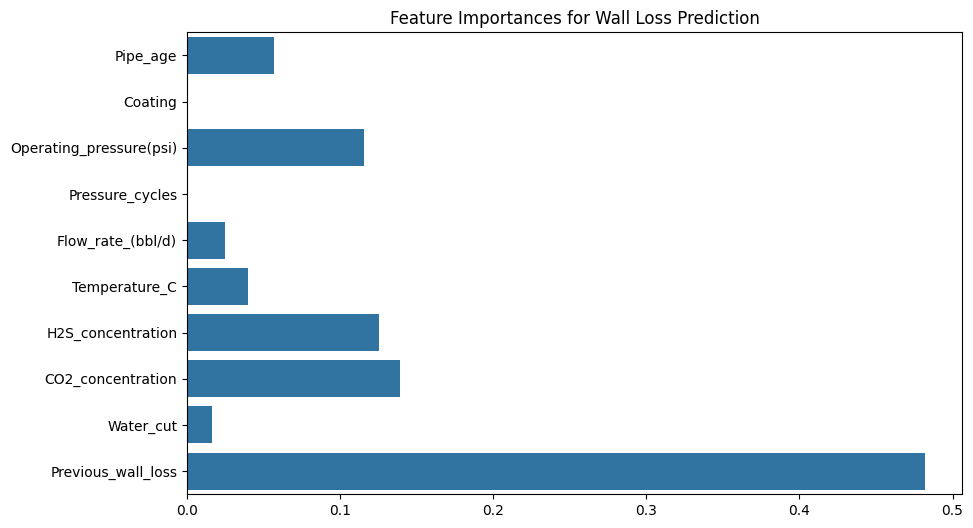

In [ ]:

importances = reg_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances for Wall Loss Prediction")
plt.show()


In [ ]:

def physics_model(t, k=0.2, n=0.6):
    return k * t ** n

def hybrid_loss(y_true, y_pred, t, lambda_=0.5, k=0.2, n=0.6):
    d_phys = physics_model(t, k, n)
    mse = np.mean((y_true - y_pred) ** 2)
    penalty = np.mean((y_pred - d_phys) ** 2)
    return mse + lambda_ * penalty
